In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

/tmp/ipython-input-2-1726118740.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


# **Understand The Training Data**

> From the train and test dataset, analysing the datas to evaluate the data.



In [33]:
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [34]:
train_df.tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [4]:
train_df.shape

(100000, 28)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [32]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# **Describe Dataset**

In [8]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


**Here it summerise the statistics like count, mean, std, min, max, 25%, 50%, 75% for numeric columns.**

In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


**Now, going to check the unique values and frequency test**

In [10]:
train_df.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10139
Age,1788
SSN,12501
Occupation,16
Annual_Income,18940
Monthly_Inhand_Salary,13235
Num_Bank_Accounts,943


Credit Score && Credit Mix column has respectively 3 and 4 unique values.

In [11]:
train_df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [12]:
train_df['Credit_Mix'].value_counts(normalize=True)

,proportion
Credit_Mix,
Standard,0.36479
Good,0.24337
_,0.20195
Bad,0.18989


# **Cleaning DataSet**

> There are many null values , wrong datas. So, have to clear that datas to analays the datas Properly.



In [6]:
train_df.columns[train_df.isnull().any()]

Index(['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [7]:
train_df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [35]:
train_df.duplicated().sum()

np.int64(0)

In [17]:
x = train_df["Monthly_Inhand_Salary"].mean()

train_df.fillna({"Monthly_Inhand_Salary": x}, inplace=True)
# train_df['Monthly_Inhand_Salary'].isnull().sum()


In [20]:
x = train_df["Num_Credit_Inquiries"].mean()

train_df.fillna({"Num_Credit_Inquiries": x}, inplace=True)

Now, Based On ***`Credit_Score`*** Evaluating the all datas

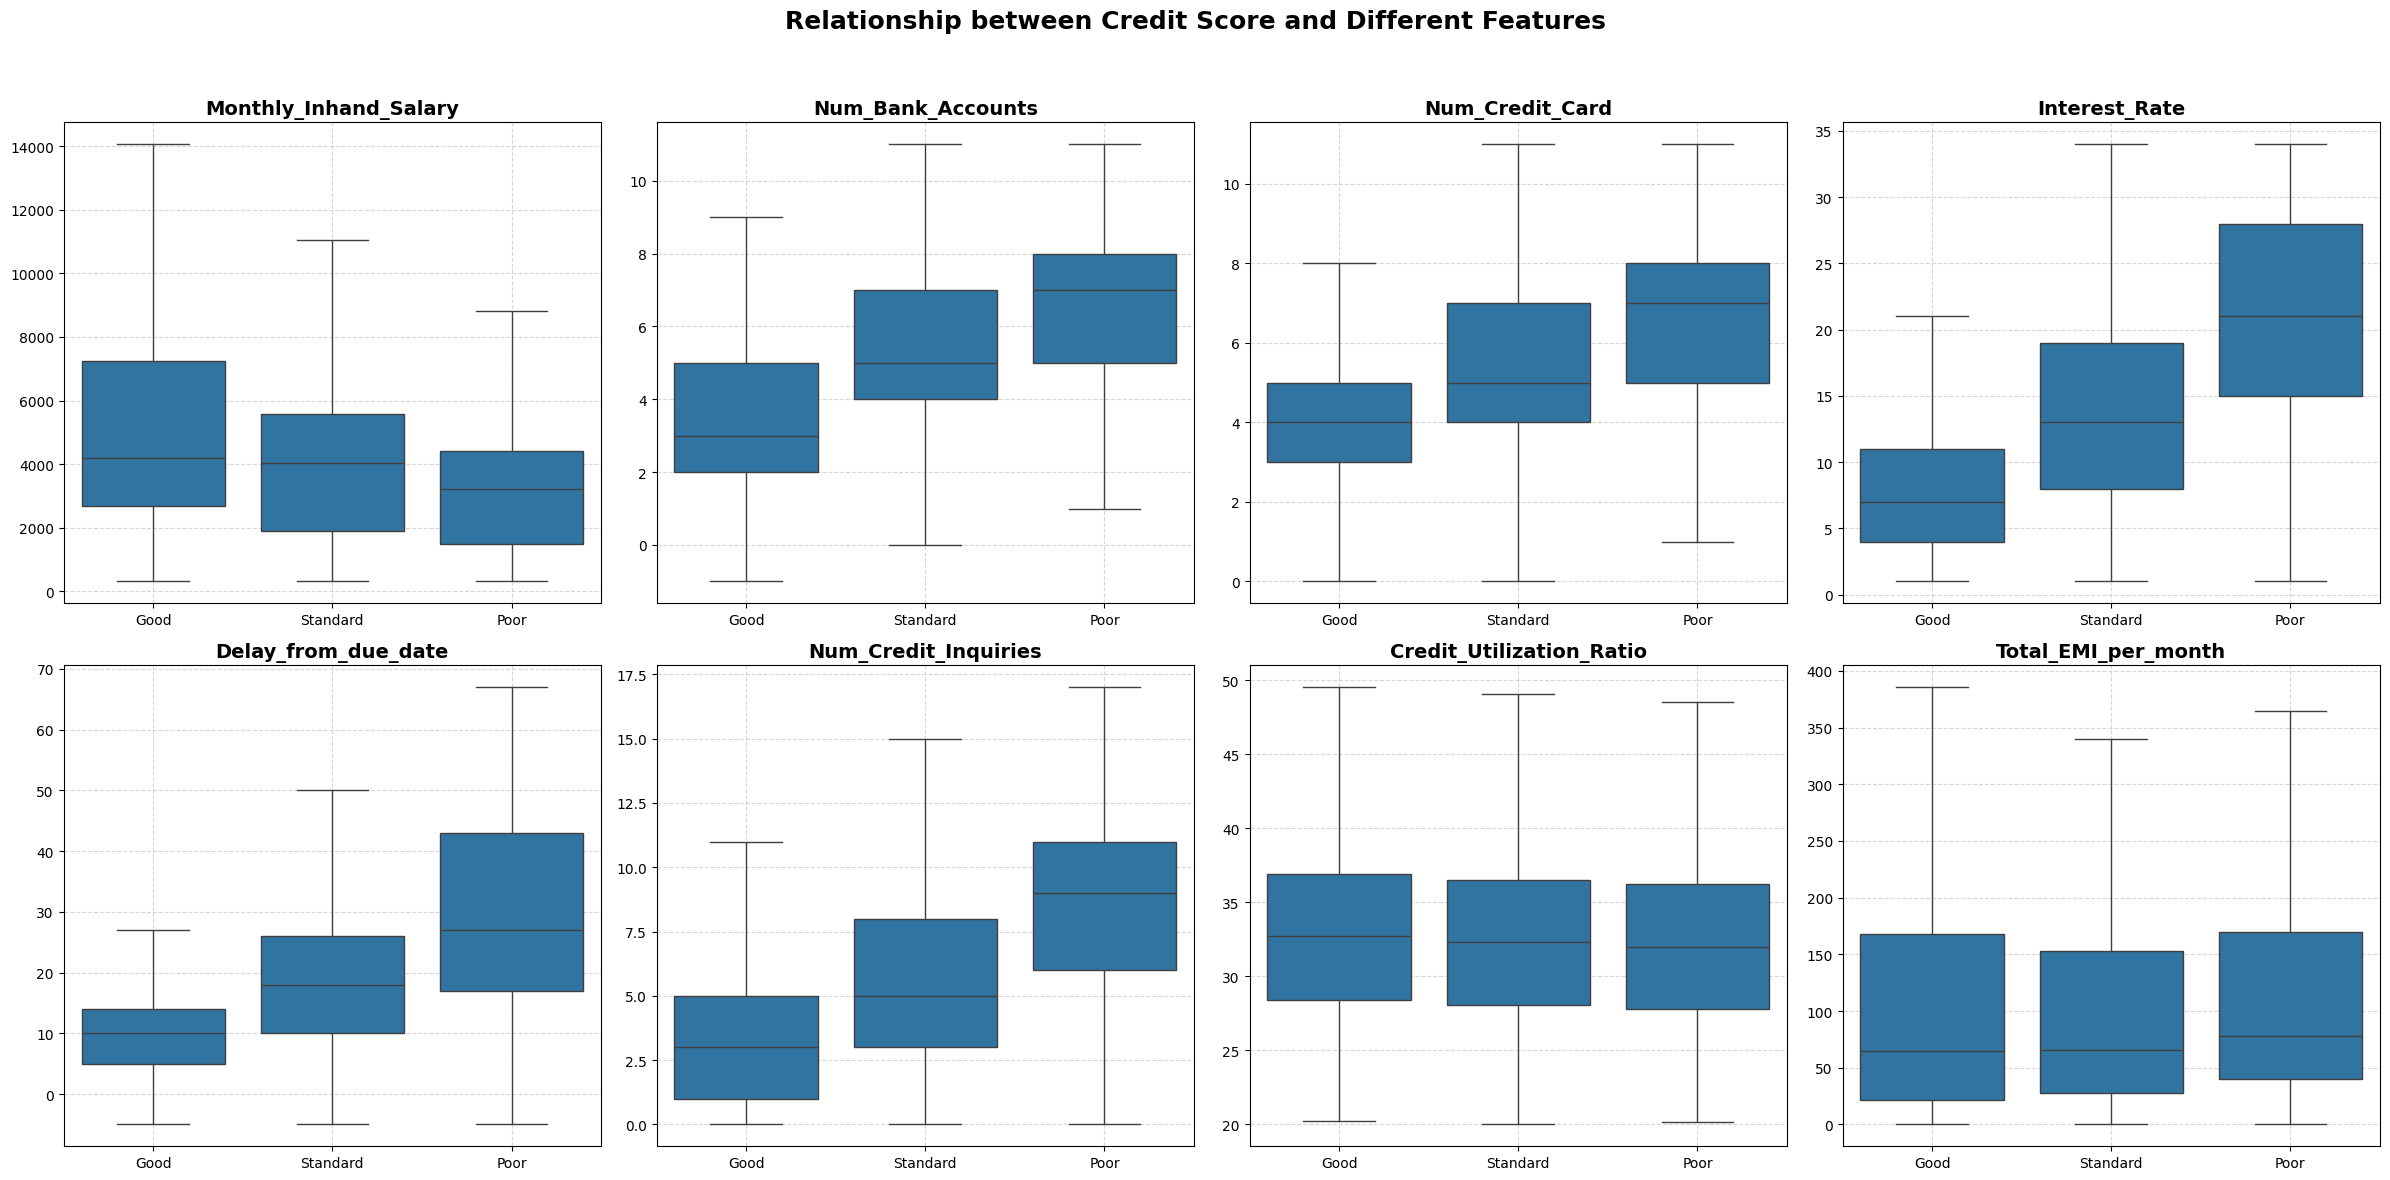

In [31]:
# List of feature columns to plot
titles = [
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month'
]

# Setup a 2x4 layout instead of 3x3 (because we have 8 plots)
fig, ax = plt.subplots(2, 4, figsize=(24, 12))
ax = ax.flatten()

# Loop through features and create boxplots
for i, feature in enumerate(titles):
    sns.boxplot(
        x='Credit_Score',
        y=feature,
        data=train_df,
        ax=ax[i],
        showfliers=False,  # Hide outliers for cleaner visuals
    )
    ax[i].set_title(feature, fontsize=14, fontweight='bold')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].grid(True, linestyle='--', alpha=0.5)

# Main title
fig.suptitle('Relationship between Credit Score and Different Features',
             fontsize=18, fontweight='bold')

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


# **Target Variable Analysis**

> Understanding the distribution and check for skewness



<Axes: >

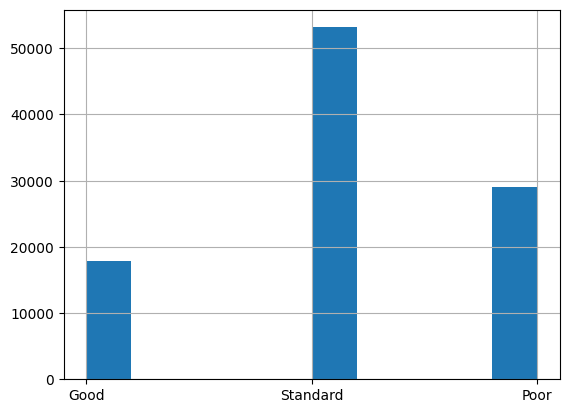

In [37]:
train_df['Credit_Score'].hist()

<Axes: >

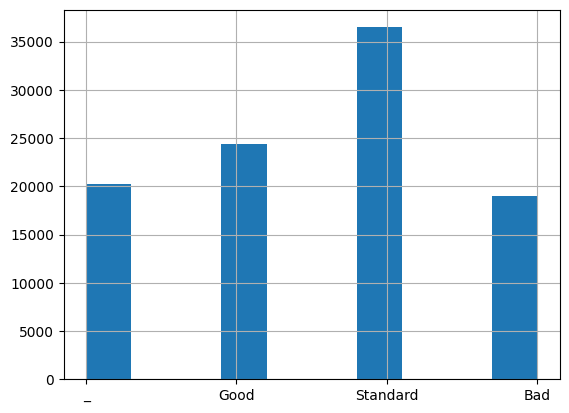

In [39]:
train_df['Credit_Mix'].hist()

# ***Train Test Split***

In [68]:
X = train_df[[
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month' ]].values
Y = train_df[['Credit_Score']].values

x = test_df[[
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month' ]].values

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(Y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y )

# **RandomForestClassification**

***Model Training***



In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')

In [59]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [61]:
train_predictions = model.predict(X_test)

In [64]:
print('Accuracy Score', accuracy_score(y_test, train_predictions))

Accuracy Score 0.7522121212121212


In [63]:
print('Classification Report', classification_report(y_test, train_predictions, target_names=le.classes_))

Classification Report               precision    recall  f1-score   support

        Good       0.72      0.62      0.67      5883
        Poor       0.76      0.75      0.75      9569
    Standard       0.76      0.80      0.78     17548

    accuracy                           0.75     33000
   macro avg       0.75      0.72      0.73     33000
weighted avg       0.75      0.75      0.75     33000



In [77]:
print('Confusion Matrix', confusion_matrix(y_test, train_predictions))
print('\n')

Confusion Matrix [[ 3674    45  2164]
 [   94  7156  2319]
 [ 1302  2253 13993]]




# ***Model Testing with Test Dataset***

In [70]:
test_predictions = model.predict(x)

In [75]:
# print('Accuracy Score', accuracy_score(y_test, test_predictions))
print(pd.Series(test_predictions).value_counts())

Standard    28488
Poor        14002
Good         7510
Name: count, dtype: int64


# **Submission File Create Where According to Customer ID the Credit Scoring Values will be stored into .CSV file. **

In [90]:
if 'Customer_ID' in test_df.columns:
  submission_df = pd.DataFrame({
      'Customer_ID': test_df['Customer_ID'],
      'Credit_Score': test_predictions
  })
  # Save the submission DataFrame to a CSV file
  submission_df.to_csv('submission.csv', index=False)

  print("Submission file 'submission.csv' created successfully.")
  print(submission_df.head(100))
else:
  submission_df = pd.DataFrame({
      'Credit_Score': test_predictions
  })

Submission file 'submission.csv' created successfully.
   Customer_ID Credit_Score
0    CUS_0xd40         Good
1    CUS_0xd40         Good
2    CUS_0xd40         Good
3    CUS_0xd40         Good
4   CUS_0x21b1         Good
..         ...          ...
95  CUS_0x5b48         Poor
96  CUS_0xa5f9         Poor
97  CUS_0xa5f9         Poor
98  CUS_0xa5f9         Poor
99  CUS_0xa5f9         Poor

[100 rows x 2 columns]


This code first ensures the test data is preprocessed correctly. Then, it creates a standard submission CSV file with the IDs and corresponding predictions. Finally, it shows how you can add the predictions as a new column directly to your test_df for internal use or further analysis, which aligns with the "Deployment/Real-world Use" scenario you mentioned. Remember to replace 'Customer_ID' with the actual name of the ID column in your test.csv file if it's different.

In [80]:
# Create a copy to avoid SettingWithCopyWarning if you modify the original test_df later
test_df_with_predictions = test_df.copy()

In [81]:
# Add the predictions as a new column
test_df_with_predictions['Predicted_Credit_Score'] = test_predictions

print("\nTest DataFrame with predictions added:")
print(test_df_with_predictions.head())


Test DataFrame with predictions added:
       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0        G

# **ROC Curve && ROC_AUC_Score**

the standard sklearn roc_curve and roc_auc_score functions are designed for binary classification (two classes, e.g., 0 and 1) or multiclass problems framed as one-vs-rest. This problem is multiclass classification with three classes ('Good', 'Standard', 'Poor')

For multiclass problems, you can generate ROC curves and calculate AUC scores using strategies like:

1.   One-vs-Rest (OvR): Calculate the ROC curve and AUC for each class against all other classes combined.
2.   One-vs-One (OvO): Calculate the ROC curve and AUC for each pair of classes.


The most common approach for visualization and reporting in multiclass is One-vs-Rest. We'll use that method.

In [83]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

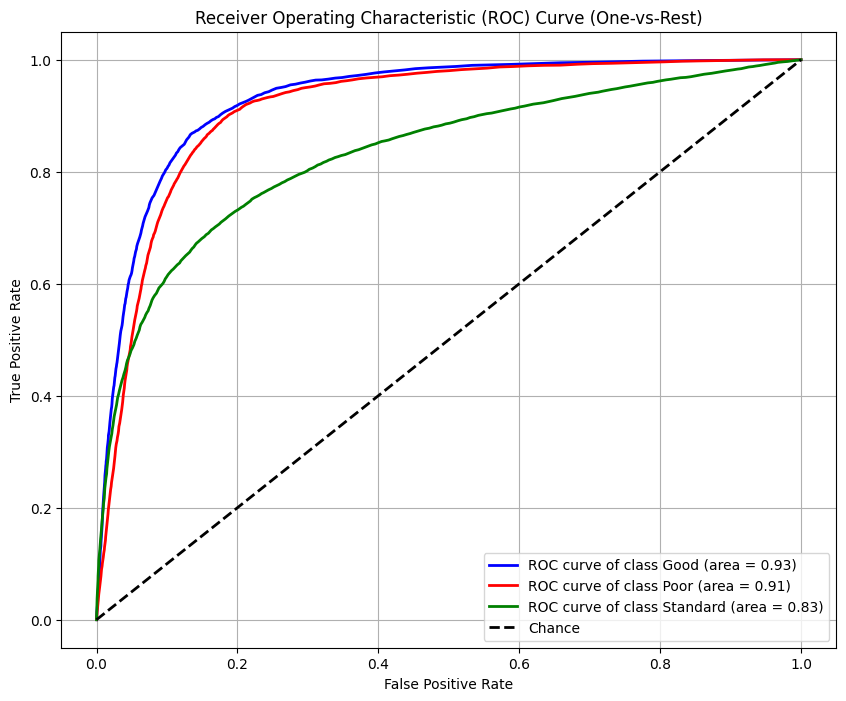


Micro-average ROC AUC: 0.91
Macro-average ROC AUC: 0.89


In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer # Useful for OvR

# --- Get Predicted Probabilities for the Validation Set (X_test) ---
# The model should be trained. We will use the probabilities on the X_test set
# as this is the set where you have the true labels (y_test) for evaluation.
y_pred_proba = model.predict_proba(X_test)

# --- Encode True Labels for OvR ---
# Use the LabelEncoder you already fitted on Y (the training targets)
# to transform y_test into numerical labels.
y_test_encoded = le.transform(y_test.ravel()) # .ravel() to flatten y_test

# Since it's a multiclass problem, we need to binarize the true labels
# into a one-vs-rest format for calculating OvR AUC.
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)

# Get the class names from the LabelEncoder
class_names = le.classes_
n_classes = len(class_names)

# --- Calculate ROC curve and AUC for each class (One-vs-Rest) ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # roc_curve expects true binary labels and predicted probabilities for the positive class
    # y_test_binarized[:, i] gives the binary true labels for class i (1 if it's class i, 0 otherwise)
    # y_pred_proba[:, i] gives the predicted probabilities of class i
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Plot the ROC curves for each class ---
plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green'] # Define colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance') # Plot the random chance line (AUC = 0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Calculate Micro and Macro Average AUC (Optional but Recommended) ---
# Micro-average AUC
# Flattens the binarized true labels and predicted probabilities
micro_auc = roc_auc_score(y_test_binarized.ravel(), y_pred_proba.ravel(), multi_class='ovr')
print(f"\nMicro-average ROC AUC: {micro_auc:0.2f}")

# Macro-average AUC
# Calculates the unweighted mean of AUC for each class
macro_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
print(f"Macro-average ROC AUC: {macro_auc:0.2f}")